# The Sakila Database

![sakilaDB](img/sakilaDB.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline

In [2]:
conn = sqlite3.connect('data/sakila.db')
df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])
df.head(3)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G


## Statistiche

In [3]:
#statistiche numeriche varie colonne
df.describe()

#mediana di film_rental_rate
df['film_rental_rate'].median()

#numero noleggi raggruppati per rental_store_city
df['rental_store_city'].value_counts()

#aggiunta colonna rental_gain_return
df['rental_gain_return'] = df['film_rental_rate'] / df['film_replacement_cost'] * 100

#calcolo media arrotondata per la colonna rental_gain_return
df['rental_gain_return'].mean().round(2)

#calcolo media del numero di noleggi per la colonna film_title
df['film_title'].value_counts().mean()

#numero noleggi per customer_lastname = 'HANSEN'
df.loc[df['customer_lastname'] == 'HANSEN']['customer_lastname'].value_counts()

#valore maggiore di film_replacement_cost
df['film_replacement_cost'].max()

#lista di film_title con film_replacement_cost massimo
df.loc[df['film_replacement_cost'] == df['film_replacement_cost'].max(), 'film_title'].unique()

#numero noleggi quando film_rating = 'PG' e film_rating = 'PG-13'
df.loc[(df['film_rating'] == 'PG') | (df['film_rating'] == 'PG-13')].shape[0]

#numero noleggi raggruppati per film_rating
df['film_rating'].value_counts()

#aggiunta colonna rental_days
df['rental_days'] = df[['rental_date', 'return_date']].apply(lambda x: (x.iloc[1] - x.iloc[0]).days, axis=1)
#df['rental_days'].head()

#media durata noleggio
df['rental_days'].mean()

#aggiunta colonna film_daily_rental_rate
df['film_daily_rental_rate'] = df['film_rental_rate'] / df['film_rental_duration']
#df['film_daily_rental_rate'].head()

#lista dei primi 10 film con film_daily_rental_rate minima
df.loc[df['film_daily_rental_rate'] == df['film_daily_rental_rate'].min()].head(10)

#numero noleggi film con rental_store_city = 'Lethbridge'
df.loc[df['rental_store_city'] == 'Lethbridge'].shape[0]

#numero noleggi film con rental_store_city = 'Lethbridge' raggruppati per film_rating
df.loc[df['rental_store_city'] == 'Lethbridge', 'film_rating'].value_counts()

#numero noleggi film con rental_store_city = 'Woodridge' e film_rental_duration > 5
df.loc[(df['rental_store_city'] == 'Woodridge') & (df['film_rental_duration'] > 5)].shape[0]

#numero noleggi film con store_id = 2 e film_replacement_cost < 10.99
df.loc[(df['store_id'] == 2) | (df['film_replacement_cost'] < 10.99)].shape[0]


8444

## Grafici

<Axes: xlabel='film_rating'>

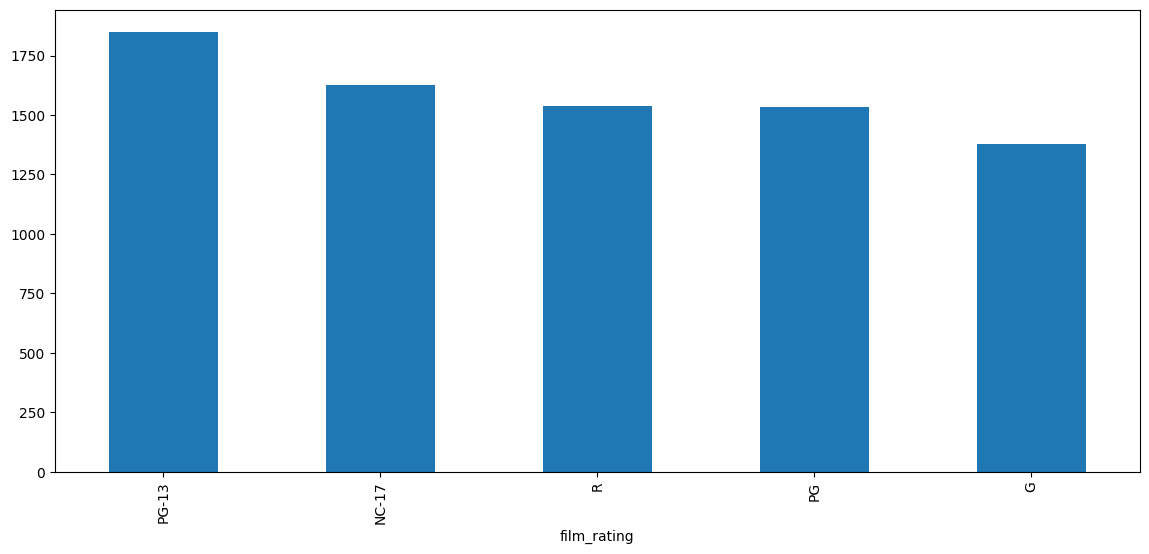

In [4]:
#grafico a scatola che mostra la film_rental_rate evidenziando mediana e quartili
#df['film_rental_rate'].plot(kind='box', vert=False, figsize=(14,6))

#grafico a density che mostra la film_rental_rate
#df['film_rental_rate'].plot(kind='density', figsize=(14,6))

#grafico a barre che mostra la film_rental_rate in base al numero di noleggi
#ax = df['film_rental_rate'].value_counts().plot(kind='bar', figsize=(14,6))
#ax.set_ylabel('Number of Rentals')

#grafico a torta che mostra il numero noleggi raggruppati per rental_store_city
#df['rental_store_city'].value_counts().plot(kind='pie', figsize=(6,6))

#grafico a barre che mostra il numero noleggi raggruppati per rental_store_city
#ax = df['rental_store_city'].value_counts().plot(kind='bar', figsize=(14,6))
#ax.set_ylabel('Number of Rentals')

#grafico a densita che mostra la rental_gain_return, la media in rosso e la mediana in verde
#ax = df['rental_gain_return'].plot(kind='density', figsize=(14,6))
#ax.axvline(df['rental_gain_return'].mean(), color='red')
#ax.axvline(df['rental_gain_return'].median(), color='green')

#grafico a barre che mostra il numero di noleggi raggruppati per film_rental_duration
#df['film_rental_duration'].value_counts().plot(kind='bar', figsize=(14,6))

#grafico a torta che mostra il numero di noleggi raggruppati per film_rental_rate
#df['film_rental_rate'].value_counts().plot(kind='pie', figsize=(6,6))

#grafico a barre che mostra il numero di noleggi raggruppati per film_rental_rate
#df['film_rental_rate'].value_counts().plot(kind='bar', figsize=(14,6))

#grafico a scatola che mostra il film_replacement_cost
#df['film_replacement_cost'].plot(kind='box', vert=False, figsize=(14,6))

#grafico a densita che mostra il film_replacement_cost, la media in rosso e la mediana in verde
#ax = df['film_replacement_cost'].plot(kind='density', figsize=(14,6))
#ax.axvline(df['film_replacement_cost'].mean(), color='red')
#ax.axvline(df['film_replacement_cost'].median(), color='green')

#grafico a barre che mostra il numero noleggi raggruppati per film_rating
#df['film_rating'].value_counts().plot(kind='bar', figsize=(14,6))

#grafico a scatola che mostra il film_replacement_cost raggruppati per film_replacement_cost, film_rating 
#df[['film_replacement_cost', 'film_rating']].boxplot(by='film_rating', figsize=(14,6))

#grafico a densita di rental_days che evidenzia la media in rosso
#ax = df['rental_days'].plot(kind='density', figsize=(14,6))
#ax.axvline(df['rental_days'].mean(), color='red')

#grafico a densita di film_daily_rental_rate che evidenzia la media in rosso
#ax = df['film_daily_rental_rate'].plot(kind='density', figsize=(14,6))
#ax.axvline(df['film_daily_rental_rate'].mean(), color='red')

#grafico a barre che mostra il numero noleggi film con rental_store_city = 'Lethbridge' raggruppati per film_rating
df.loc[df['rental_store_city'] == 'Lethbridge', 'film_rating'].value_counts().plot(kind='bar', figsize=(14,6))
